In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
air=pd.read_csv("C:/Users/MAHESHWARI/datasciencecourse/1DATA SCIENCE COURSE DATA SETS/Assignments/Clustering/EastWestAirlines.csv")
print(air.head())


   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


In [4]:
def norm_fun(i):
	x=(i-i.min()) / (i.max()   -   i.min())
	return (x)

df_nom=norm_fun(air.iloc[:,1:])
print (df_nom.head())

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0     0.011628           0.000000         0.000000           0.843742     0.0  
1     0.023256           0.000000         0.000000           0.839884     0.0  
2     0.046512           0.000000         0.000000           0.847842     0.0  
3     0.011628           0.000000         0.000000           0.837955     0.0  
4     0.302326           0.067398         0.075472           0.835905     1.0  


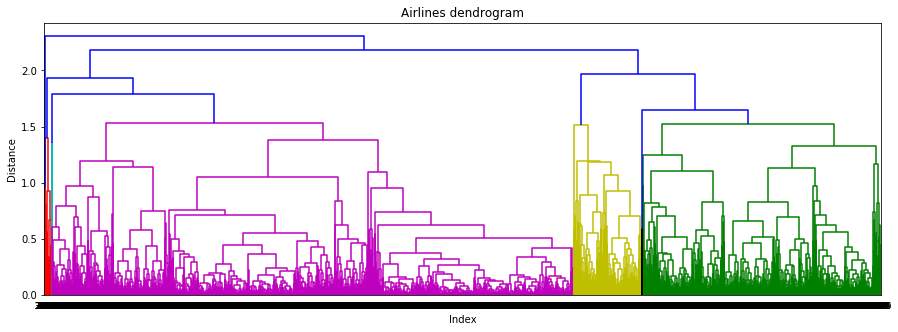

In [6]:
from scipy.cluster.hierarchy import linkage

import scipy.cluster.hierarchy as sch

z=linkage(df_nom,method="complete",metric="euclidean")
plt.figure(figsize=(15,5));
plt.title("Airlines dendrogram");
plt.xlabel('Index');
plt.ylabel('Distance');
sch.dendrogram(
	z,
	leaf_rotation=0. ,
	leaf_font_size=8.,
)
plt.show()


In [8]:
from sklearn.cluster import AgglomerativeClustering
h_complete= AgglomerativeClustering(n_clusters=3,linkage='complete',affinity="euclidean").fit(df_nom)

cluster_labels=pd.Series(h_complete.labels_)
print(cluster_labels)


0       2
1       2
2       2
3       2
4       0
       ..
3994    0
3995    0
3996    0
3997    2
3998    2
Length: 3999, dtype: int64
